# Fitting data

The process of extracting information from data using computers is called *machine learning*.

Machine learning a very large field and covers a whole host of techniques. In this course we will be discovering a few of them but let's first start with the simplest form of machine learning, the *linear fit* or *linear regression*.

## Input data

First we shall need some data. For this example we shall be pretending that we have measured these data from an experiment and we want to extract the underlying parameters of the system that generated them.

I have prepared a CSV file which you can read into pandas using `read_csv`:

In [1]:
import pandas as pd

data = pd.read_csv("https://milliams.com/courses/applied_data_analysis/linear.csv")
data.head()

x          y
0  3.745401   3.229269
1  9.507143  14.185654
2  7.319939   9.524231
3  5.986585   6.672066
4  1.560186  -3.358149

We can see here that the data has two columns, `x` and `y`. Traditionally, $x$ is used for the things we can easily measure in the world and use as inputs, and $y$ is used for the thing we want to predict. In our case, we want to work out what the value of $y$ should be for any given $x$.

In this case we have one single $x$ column but in a more complicated data set we may have multiple $x_1$, $x_2$ etc. in which case the set together is sometimes given the upper-case letter $X$. Each $x_n$ column is called a *feature*. Features are usually things that you have measured as part of a experiment (e.g. height of a person, temperature of a room, size of a garden etc.).

Our $y$ column is the thing that we are going to create a model to predict the value of. The $y$ column of the input data is often called the *label* or the *target*.

Let's check how many rows we have:

In [2]:
data.count()

x    50
y    50
dtype: int64

We have 50 rows here. In the input data, each row is often called a *sample* (though sometimes also called an *instance*, *example* or *observation*). For example, it could be the information about a single person from a census or the measurements at a particular time from a weather station.

Let's have a look at what the data looks like when plotted:

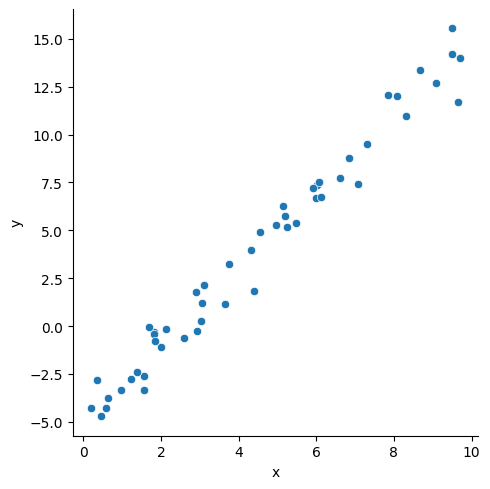

In [3]:
import seaborn as sns

sns.relplot(data=data, x="x", y="y")

We can clearly visually see here that there is a linear relationship between the $x$ and $y$ values but we need to be able to extract the exact parameters programmatically.

## Linear regression

### Setting up our model

For this and for the other machine learning techniques in this course, we will be using [scikit-learn](http://scikit-learn.org/). It provides a whole host of tools for studying data. You may also want to investigate [statsmodels](https://www.statsmodels.org) which also provides a large number of tools for statistical exploration.

scikit-learn provides a number of models which you can use to study your data. Each model is a Python class which can be imported and used. The usual process for using a model is:

1. Import the model you want to use
2. Create an instance of that model and set any *hyperparameters* you want
3. *Fit* the model to the data, this computes the parameters of the model using machine learning
4. *Predict* new information using the model

As we saw by plotting the data, the relationship between $x$ and $y$ is linear. In scitkit-learn, linear regression is available as [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

We import the model and create an instance of it. By default the `LinearRegression` model will fit the y-intercept, but since we don't want to make that assumption we explicitly pass `fit_intercept=True`. `fit_intercept` is an example of a *hyperparameter*, which are variables or options in a model which you set up-front rather than letting them be learned from the data.

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

When running a Jupyter Notebook, you will see this model summary box appear every time a cell evaluates to the model itself. Here, writing `model` causes this to happen explicitly but it will happen any time the last line in a cell has the return value of the model too.

### Fitting the data

Once we have created our model, we can fit it to the data by calling the `fit()` method on it. This takes two arguments:

1. The input data as a *two-dimensional* structure of the size $(N_{samples}, N_{features})$.
2. The labels or targets of the data as a *one-dimensional* data structure of size $(N_{samples})$.

In our case we only have one feature, $x$, and 50 data points so it should be in the shape $(50, 1)$. If we just request `data["x"]` then that will be a 1D array (actually a pandas `Series`) of shape $(50)$ so we must request the data with `data[["x"]]` (which returns it as a single-column, but still two-dimensional, `DataFrame`). For a more thorough explanation of this dimensionality difference, see [this explanation](aside_one_two_dimensional.ipynb).

If you're using pandas to store your data (as we are) then just remember that the first argument should be a `DataFrame` and the second should be a `Series`.

In [5]:
X = data[["x"]]
y = data["y"]

In [6]:
model.fit(X, y)

LinearRegression()

It is when you call this function that scikit-learn will go away and perform the machine learning algorithm. In our case it takes a fraction of a second but more complex models could take hours to compute.

By the time that this function returns, the `model` object will have had it's internal parameters set as best the algorithm can do in order to predict $y$ from $x$.

We see the summary box appear here too as the `fit` method returns the model that it was called on, allowing you to chain together methods if you want.

### Making predictions using the model

Once we've performed the fit, we can use it to predict the value of new data points which weren't part of the original data set.

We can use this to plot the fit over the original data to compare the result. By getting the predicted $y$ values for the minimum and maximum $x$ values, we can plot a straight line between them to visualise the model.

The `predict()` function takes an array of the same shape as the original input data ($(N_{samples}, N_{features})$) so we put our list of $x$ values into a `DataFrame` before passing it to `predict()`.

We then plot the original data in the same way as before and draw the prediction line in the same plot.

In [7]:
pred = pd.DataFrame({"x": [0, 10]})  # Make a new DataFrame containing the X values
pred["y"] = model.predict(pred)  # Make a prediction and add that data into the table
pred

x          y
0   0  -4.903311
1  10  14.873255

<Axes: xlabel='x', ylabel='y'>

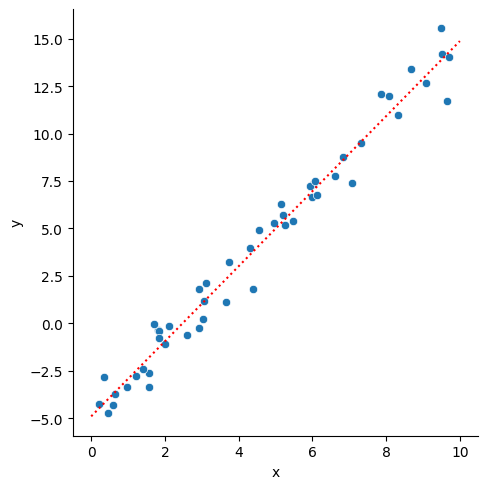

In [8]:
import seaborn as sns
sns.relplot(data=data, x="x", y="y")
sns.lineplot(data=pred, x="x", y="y", c="red", linestyle=":")

As well as plotting the line in a graph, we can also extract the calculated values of the gradient and y-intercept. The gradient is available as a list of values, `model.coef_`, one for each dimension or feature. The intercept is available as  `model.intercept_`:

In [9]:
print(" Model gradient: ", model.coef_[0])
print("Model intercept:", model.intercept_)

 Model gradient:  1.9776566003853107
Model intercept: -4.903310725531115


The equation that we have extracted can therefore be represented as:

$$y = 1.97 x - 4.90$$

The original data was produced (with random wobble applied) from a straight line with gradient $2$ and y-intercept of $-5$. Our model has managed to predict values very close to the original.

If you want to, you can see [the code that generated the original data](aside_generate_linear_data.ipynb).

### Exercise

- Run the above data reading and model fitting. Ensure that you get the same answer we got above.
- Try fitting without allowing the y-intercept to vary. How does it affect the prediction of the gradient? [<small>answer</small>](answer_no_y_intercept.ipynb)